### NHÓM HIGH 
#### Trần Thị Ngọc Diệp - K214142060 
#### Đỗ Thị Cẩm Giang - K214142062 
#### Trần Thị Thu Hà - K214142063 
#### Dương Khánh Linh - K214142069 
#### Võ Nguyễn Lê Ngân - K214142075


In [150]:
# IMPORT ESSENTIAL YOUR LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [151]:
# LOAD YOUR DATA
df = pd.read_csv('loan1-Copy.csv') 
df[0:5] # = df.head()

,term,id,loan_amnt,home_ownership,emp_length,annual_inc,loan_status,purpose,dti,revol_util,total_rec_late_fee,grade
0,36 months,1077501,5000,RENT,10.0,24000.0,Fully Paid,credit_card,27.65,83.70%,0.00,A
1,60 months,1077430,2500,RENT,1.0,30000.0,Charged Off,car,1.00,9.40%,0.00,A
2,36 months,1077175,2400,RENT,10.0,12252.0,Fully Paid,small_business,8.72,98.50%,0.00,A
3,36 months,1076863,10000,RENT,10.0,49200.0,Fully Paid,other,20.00,21%,16.97,A
4,60 months,1075358,3000,RENT,1.0,80000.0,Current,other,17.94,53.90%,0.00,B


In [152]:
print(df.shape)

(39717, 12)


In [153]:
pd.value_counts(df.grade)

A    21722
B    17995
Name: grade, dtype: int64

In [154]:
# CREATE LISTS OF FEATURES THAT ARE CATEGORICAL OR NUMERICAL

Category_list = []
Numerical_list = []

for i in df.columns:
  if df[i].dtype == 'object':
    Category_list.append(i)
  else:
    Numerical_list.append(i)

print('Categorical list:', Category_list)
print('Numerical list :', Numerical_list)

Categorical list: ['term', 'home_ownership', 'loan_status', 'purpose', 'revol_util', 'grade']
Numerical list : ['id', 'loan_amnt', 'emp_length', 'annual_inc', 'dti', 'total_rec_late_fee']


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   term                39717 non-null  object 
 1   id                  39717 non-null  int64  
 2   loan_amnt           39717 non-null  int64  
 3   home_ownership      39717 non-null  object 
 4   emp_length          38642 non-null  float64
 5   annual_inc          39717 non-null  float64
 6   loan_status         39717 non-null  object 
 7   purpose             39717 non-null  object 
 8   dti                 39717 non-null  float64
 9   revol_util          39667 non-null  object 
 10  total_rec_late_fee  39717 non-null  float64
 11  grade               39717 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 3.6+ MB


## CHUYỂN KIỂU DỮ LIỆU

In [156]:
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [157]:
amount_column1 = ['revol_util']
df[amount_column1] = df[amount_column1].apply(pd.to_numeric)

# MÃ HÓA BIẾN PHỤ THUỘC

In [158]:
#ĐỔI KIỂU DATA GRADE
from sklearn.preprocessing import LabelEncoder
# Khởi tạo một đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng LabelEncoder để mã hóa cột "grade"
df['grade_encoded'] = label_encoder.fit_transform(df['grade'])

print(df['grade_encoded'])

0        0
1        0
2        0
3        0
4        1
        ..
39712    0
39713    1
39714    0
39715    0
39716    0
Name: grade_encoded, Length: 39717, dtype: int32


# EDA

In [159]:
# General statistics
def stats(x):
    print(f"Variable: {x}")
    print(f"Type of variable: {df[x].dtype}")
    print(f"Total observations: {df[x].shape[0]}")
    detect_null_val = df[x].isnull().values.any()
    if detect_null_val:
        print(f"Missing values: {df[x].isnull().sum()} ({(df[x].isnull().sum() / df[x].isnull().shape[0] *100).round(2)}%)")
    else:
        print(f"Missing values {df[x].isnull().values.any()}")
    print(f"Unique values: {df[x].nunique()}")
    if df[x].dtype != "O":
        print(f"Min: {int(df[x].min())}")
        print(f"25%: {int(df[x].quantile(q=[.25]).iloc[-1])}")
        print(f"Median: {int(df[x].median())}")
        print(f"75%: {int(df[x].quantile(q=[.75]).iloc[-1])}")
        print(f"Max: {int(df[x].max())}")
        print(f"Mean: {df[x].mean()}")
        print(f"Std dev: {df[x].std()}")
        print(f"Variance: {df[x].var()}")
        print(f"Skewness: {scipy.stats.skew(df[x])}")
        print(f"Kurtosis: {scipy.stats.kurtosis(df[x])}")
        print("")
        
        # Percentiles 1%, 5%, 95% and 99%
        print("Percentiles 1%, 5%, 95%, 99%")
        display(df[x].quantile(q=[.01, .05, .95, .99]))
        print("")
    else:
        print(f"List of unique values: {df[x].unique()}")

In [160]:
# Variable vs. target chart
def target(x):
    short_0 = df[df.grade_encoded == 0].loc[:,x]
    short_1 = df[df.grade_encoded == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.9, label='Not-default', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.9, label='Default', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

In [161]:
# Boxplot + Hist chart
def boxhist(x):
    variable = df[x]
    np.array(variable).mean()
    np.median(variable)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.title(x, fontsize=10, loc="right")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()

In [162]:
# Barh chart
def barh(x):
    df[x].value_counts().plot(kind="barh", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
    plt.xlabel("Absolute values", fontsize=10)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.ylabel(x, fontsize=10)
    plt.title(x, fontsize=10, loc="right")

In [163]:
# Pivot_table_mean
def pivot_mean(a, b, c):
    type_pivot_mean = df.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.mean)
    display(type_pivot_mean)
    
# Display pivot_table
    type_pivot_mean.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12)
    
# Pivot_table_sum
def pivot_sum(a, b, c):
    type_pivot_sum = df.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.sum)
    display(type_pivot_sum)
    
# Display pivot_table
    type_pivot_sum.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);

In [164]:
# Scatter plot
def scatter(x, y):
    targets = df['grade_encoded'].unique()
    for target in targets:
        a = df[df["grade_encoded"] == target][x]
        b = df[df["grade_encoded"] == target][y]
        plt.scatter(a, b, label=f"grade_encoded: {target}", marker="*")
        plt.xlabel(x, fontsize=10)
        plt.ylabel(y, fontsize=10)
        plt.title("abc", fontsize=10, loc="right")
        plt.legend()
        plt.show()

# MÔ TẢ DỮ LIỆU

In [165]:
df.describe().round(2)

,id,loan_amnt,emp_length,annual_inc,dti,revol_util,total_rec_late_fee,grade_encoded
count,39717.00,39717.00,38642.00,39717.00,39717.00,39667.00,39717.00,39717.00
mean,683131.91,11219.44,5.09,68968.93,13.32,48.83,1.36,0.45
std,210694.13,7456.67,3.41,63793.77,6.68,28.33,7.29,0.50
min,54734.00,500.00,1.00,4000.00,0.00,0.00,0.00,0.00
25%,516221.00,5500.00,2.00,40404.00,8.17,25.40,0.00,0.00
50%,665665.00,10000.00,4.00,59000.00,13.40,49.30,0.00,0.00
75%,837755.00,15000.00,9.00,82300.00,18.60,72.40,0.00,1.00
max,1077501.00,35000.00,10.00,6000000.00,29.99,99.90,180.20,1.00


In [166]:
df.describe(include=[np.object])

,term,home_ownership,loan_status,purpose,grade
count,39717,39717,39717,39717,39717
unique,2,4,3,14,2
top,36 months,RENT,Fully Paid,debt_consolidation,A
freq,29096,18900,32950,18641,21722


In [167]:
loan = df.grade_encoded.value_counts().to_frame().rename(columns={"grade_encoded":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
display(loan)

,absolute,percent
0,21722,54.69
1,17995,45.31


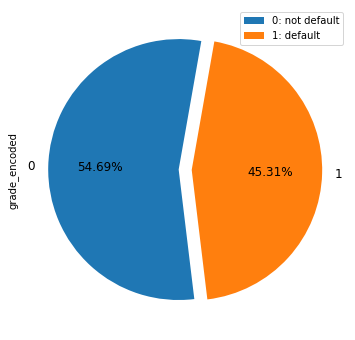

In [168]:
# pie chart
df.grade_encoded.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: not default","1: default"])

## HANDLING MISSING VALUES

In [169]:
#kiểm tra số hàng không có giá trị
print('total number of empty rows:')
print(df.isnull().all(axis=1).sum())

total number of empty rows:
0


In [170]:
#kiểm tra số cột không có giá trị và đếm giá trị null
print('total number of empty columns:')
print(df.isnull().all(axis=0).sum())
df.isnull().sum()

total number of empty columns:
0


term                     0
id                       0
loan_amnt                0
home_ownership           0
emp_length            1075
annual_inc               0
loan_status              0
purpose                  0
dti                      0
revol_util              50
total_rec_late_fee       0
grade                    0
grade_encoded            0
dtype: int64

In [171]:
for i in df.columns:
    if (df[i].isna().sum()>0):
        print("Feature",i,"has",df[i].isna().sum(),"missing values.")  
        print('---'*20)

Feature emp_length has 1075 missing values.
------------------------------------------------------------
Feature revol_util has 50 missing values.
------------------------------------------------------------


In [172]:
#lấp đầy giá trị missing bằng mean
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)
df['emp_length'].fillna(df['emp_length'].median(), inplace=True)

In [173]:
df.head()

,term,id,loan_amnt,home_ownership,emp_length,annual_inc,loan_status,purpose,dti,revol_util,total_rec_late_fee,grade,grade_encoded
0,36 months,1077501,5000,RENT,10.0,24000.0,Fully Paid,credit_card,27.65,83.7,0.00,A,0
1,60 months,1077430,2500,RENT,1.0,30000.0,Charged Off,car,1.00,9.4,0.00,A,0
2,36 months,1077175,2400,RENT,10.0,12252.0,Fully Paid,small_business,8.72,98.5,0.00,A,0
3,36 months,1076863,10000,RENT,10.0,49200.0,Fully Paid,other,20.00,21.0,16.97,A,0
4,60 months,1075358,3000,RENT,1.0,80000.0,Current,other,17.94,53.9,0.00,B,1


In [174]:
df.isna().sum()

term                  0
id                    0
loan_amnt             0
home_ownership        0
emp_length            0
annual_inc            0
loan_status           0
purpose               0
dti                   0
revol_util            0
total_rec_late_fee    0
grade                 0
grade_encoded         0
dtype: int64

## HANDLING DUPLICATED DATA

In [175]:
df.duplicated().sum()

0

## HANDLING OUTLIERS

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   term                39717 non-null  object 
 1   id                  39717 non-null  int64  
 2   loan_amnt           39717 non-null  int64  
 3   home_ownership      39717 non-null  object 
 4   emp_length          39717 non-null  float64
 5   annual_inc          39717 non-null  float64
 6   loan_status         39717 non-null  object 
 7   purpose             39717 non-null  object 
 8   dti                 39717 non-null  float64
 9   revol_util          39717 non-null  float64
 10  total_rec_late_fee  39717 non-null  float64
 11  grade               39717 non-null  object 
 12  grade_encoded       39717 non-null  int32  
dtypes: float64(5), int32(1), int64(2), object(5)
memory usage: 3.8+ MB


In [177]:
df1 = df.copy()

In [178]:
df_ca = df1.select_dtypes(exclude=["int64","float64", "int32"]).copy()
df_nu = df1.select_dtypes(exclude=["object","category"]).copy()

In [179]:
df_ca.head()

,term,home_ownership,loan_status,purpose,grade
0,36 months,RENT,Fully Paid,credit_card,A
1,60 months,RENT,Charged Off,car,A
2,36 months,RENT,Fully Paid,small_business,A
3,36 months,RENT,Fully Paid,other,A
4,60 months,RENT,Current,other,B


In [180]:
df_nu.head()

,id,loan_amnt,emp_length,annual_inc,dti,revol_util,total_rec_late_fee,grade_encoded
0,1077501,5000,10.0,24000.0,27.65,83.7,0.00,0
1,1077430,2500,1.0,30000.0,1.00,9.4,0.00,0
2,1077175,2400,10.0,12252.0,8.72,98.5,0.00,0
3,1076863,10000,10.0,49200.0,20.00,21.0,16.97,0
4,1075358,3000,1.0,80000.0,17.94,53.9,0.00,1


### Boxplot: Visualizing the numeric data dispersion

#### ANNUAL_INC

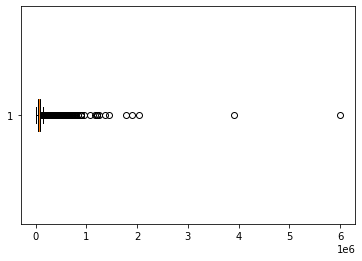

In [181]:
plt.boxplot(df.annual_inc, vert=False)
plt.show()

In [182]:
# Dealing with the outliers through IQR score method
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
df['annual_inc'] = df.annual_inc[~((df.annual_inc < (Q1 - 1.5 * IQR)) |(df.annual_inc > (Q3 + 1.5 * IQR)))]

print(df.annual_inc.describe())

count     37874.000000
mean      61360.038960
std       28210.186388
min        4000.000000
25%       40000.000000
50%       56178.000000
75%       78000.000000
max      145008.000000
Name: annual_inc, dtype: float64


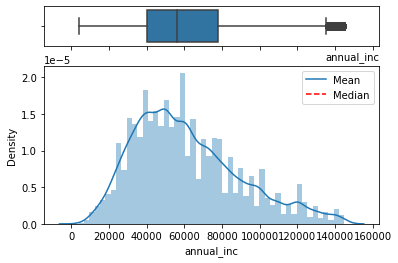

In [183]:
boxhist("annual_inc")

#### LOAN_AMNT

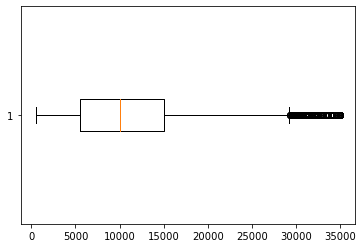

In [184]:
plt.boxplot(df.loan_amnt, vert=False)
plt.show()

In [185]:
# Dealing with the outliers through IQR score method
Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
df['loan_amnt'] = df.loan_amnt[~((df.loan_amnt < (Q1 - 1.5 * IQR)) |(df.loan_amnt > (Q3 + 1.5 * IQR)))]

print(df.loan_amnt.describe())

count    38487.000000
mean     10521.750201
std       6441.089924
min        500.000000
25%       5125.000000
50%       9600.000000
75%      15000.000000
max      29175.000000
Name: loan_amnt, dtype: float64


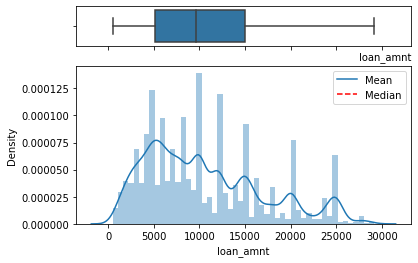

In [186]:
boxhist("loan_amnt")

## DATA VISUALIZATION

In [187]:
Xnum = df_nu.drop(["grade_encoded"], axis= "columns")
ynum = df_nu.grade_encoded

In [188]:
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr

In [189]:
# Identifying the predictive features using the Pearson Correlation p-value
pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col], 
    ynum) for col in Xnum.columns], 
    columns=["Pearson Corr.", "p-value"], 
    index=Xnum.columns,
).round(4)

,Pearson Corr.,p-value
id,-0.0292,0.0000
loan_amnt,0.1815,0.0000
emp_length,-0.0080,0.1101
annual_inc,0.0316,0.0000
dti,0.0838,0.0000
revol_util,0.3802,0.0000
total_rec_late_fee,0.0854,0.0000


### Visualization of the numeric distribution:

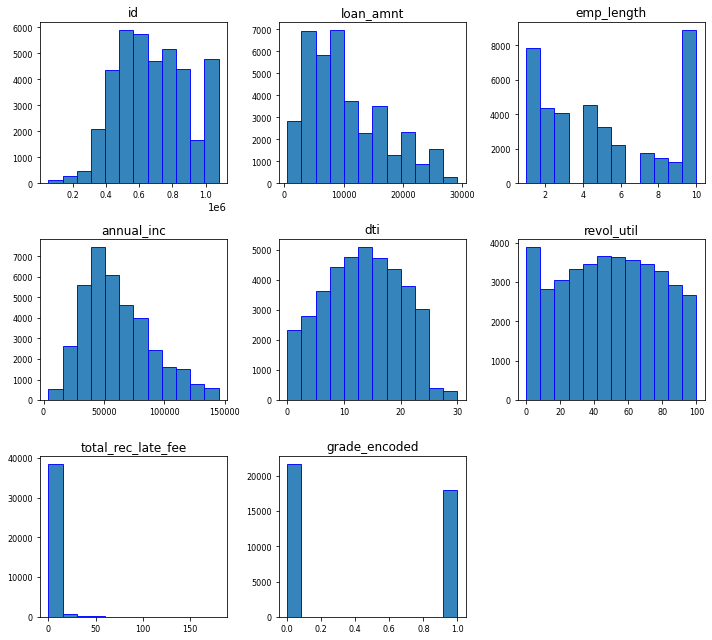

In [190]:
df.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

### Visualization of the categoric distribution:

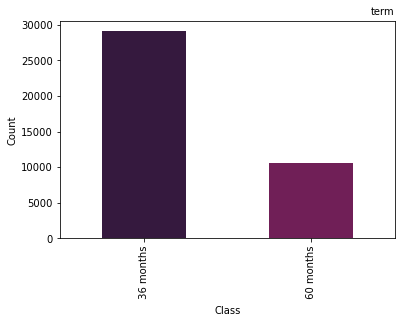

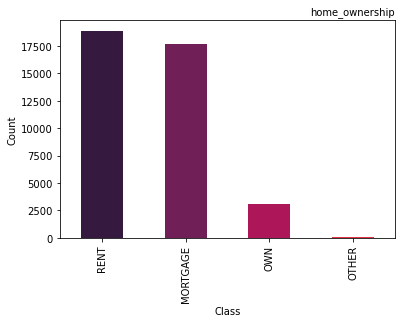

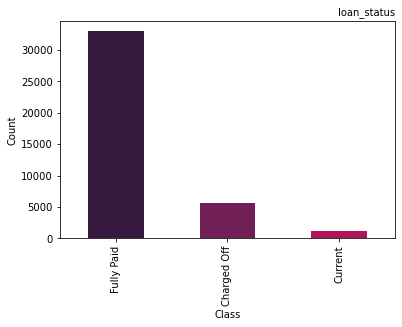

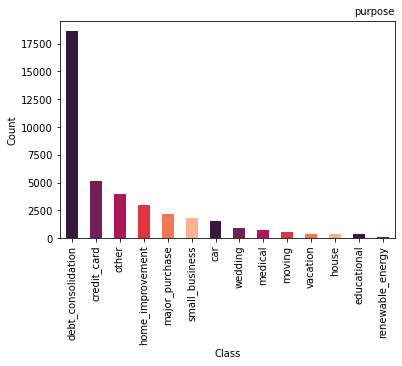

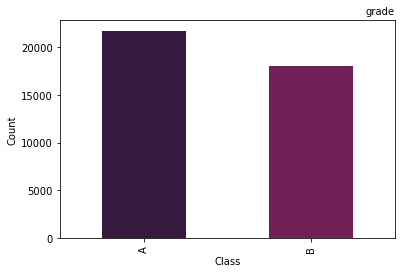

In [191]:
for col in df.select_dtypes(include=["object"]).columns:
    df[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.show()

#### LOAN_AMNT

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

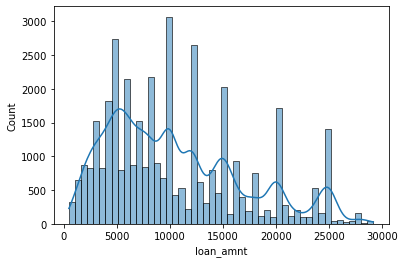

In [192]:
sns.histplot(df.loan_amnt,  kde=True)

In [193]:
stats("loan_amnt")

Variable: loan_amnt
Type of variable: float64
Total observations: 39717
Missing values: 1230 (3.1%)
Unique values: 832
Min: 500
25%: 5125
Median: 9600
75%: 15000
Max: 29175
Mean: 10521.750201366694
Std dev: 6441.0899242210835
Variance: 41487639.41190236
Skewness: nan
Kurtosis: nan

Percentiles 1%, 5%, 95%, 99%


0.01     1200.0
0.05     2400.0
0.95    24250.0
0.99    25000.0
Name: loan_amnt, dtype: float64

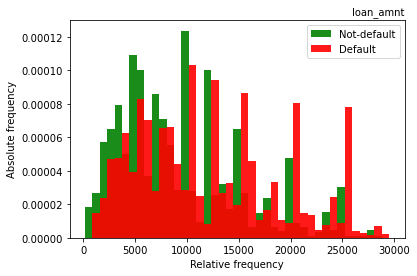

In [194]:
target("loan_amnt")

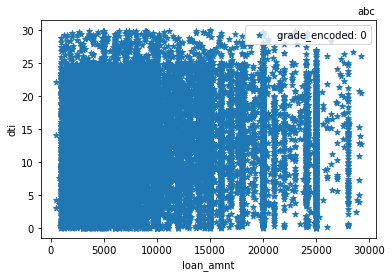

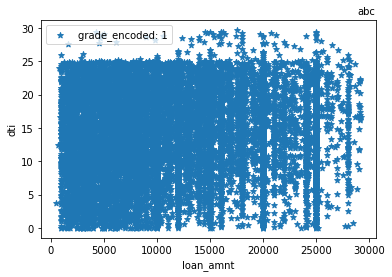

In [195]:
scatter("loan_amnt", "dti")

In [196]:
df.loan_amnt.corr(df.dti)

0.07498448589694169

#### TERM

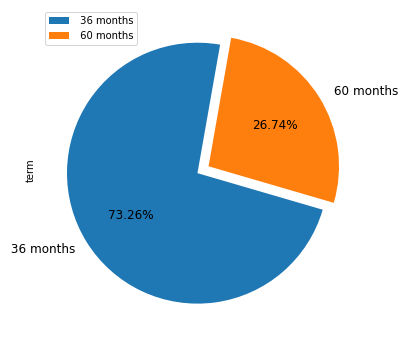

In [197]:
df.term.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.show()

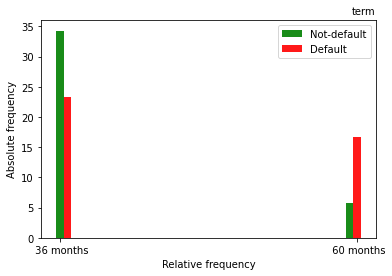

In [198]:
target("term")

term,36 months,60 months
home_ownership,,
MORTGAGE,71065.712414,73413.533552
OTHER,60590.782609,32000.000000
OWN,51012.586273,56786.363506
RENT,52698.775345,56421.462464


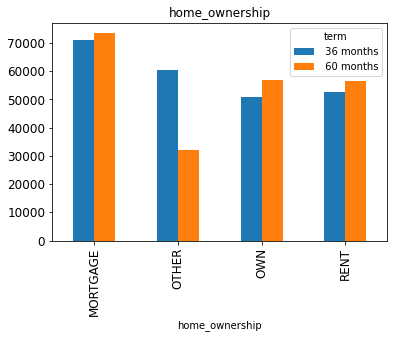

In [199]:
pivot_mean("term", "home_ownership", "annual_inc")

#### EMP_LENGTH

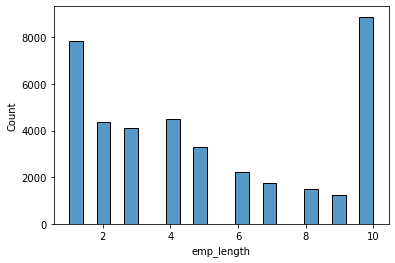

In [200]:
sns.histplot(df.emp_length)
plt.show()

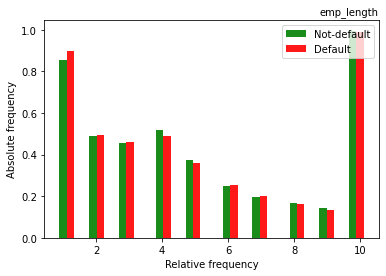

In [201]:
target("emp_length")

term,36 months,60 months
emp_length,,
1.0,0.398371,0.732051
2.0,0.381776,0.715897
3.0,0.374515,0.709870
4.0,0.351440,0.703152
5.0,0.331774,0.719656
6.0,0.345687,0.719880
7.0,0.355715,0.710728
8.0,0.334604,0.704651
9.0,0.334071,0.697740


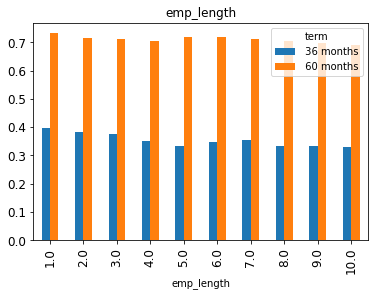

In [202]:
pivot_mean("term", "emp_length", "grade_encoded")

#### HOME_OWNERSHIP

In [203]:
pd.value_counts(df.home_ownership)

RENT        18900
MORTGAGE    17659
OWN          3060
OTHER          98
Name: home_ownership, dtype: int64

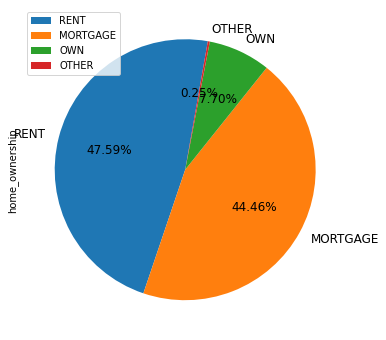

In [204]:
df.home_ownership.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.show()

In [205]:
stats("annual_inc")

Variable: annual_inc
Type of variable: float64
Total observations: 39717
Missing values: 1843 (4.64%)
Unique values: 4912
Min: 4000
25%: 40000
Median: 56178
75%: 78000
Max: 145008
Mean: 61360.03895970848
Std dev: 28210.186387598453
Variance: 795814616.023045
Skewness: nan
Kurtosis: nan

Percentiles 1%, 5%, 95%, 99%


0.01     14400.0
0.05     24000.0
0.95    120000.0
0.99    138000.0
Name: annual_inc, dtype: float64

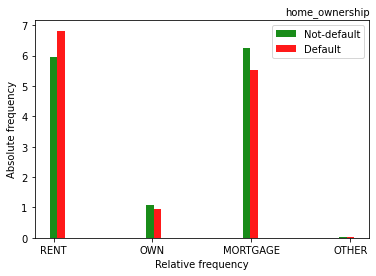

In [206]:
target("home_ownership")

#### ANNUAL_INC

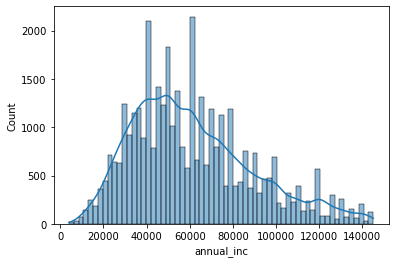

In [207]:
sns.histplot(df.annual_inc,  kde=True)
plt.show()

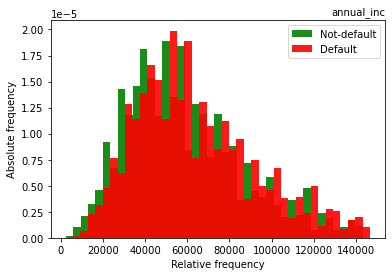

In [208]:
target("annual_inc")

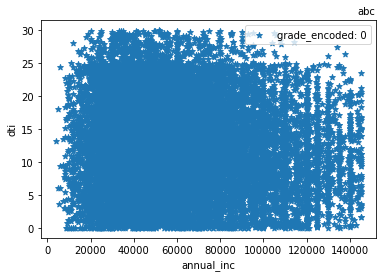

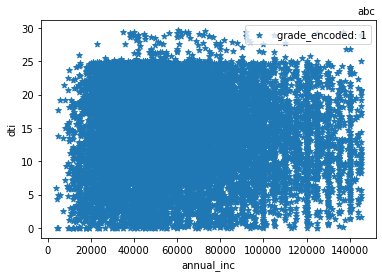

In [209]:
scatter("annual_inc", "dti")

In [210]:
df.annual_inc.corr(df.dti)

-0.0751251955258533

#### PURPOSE

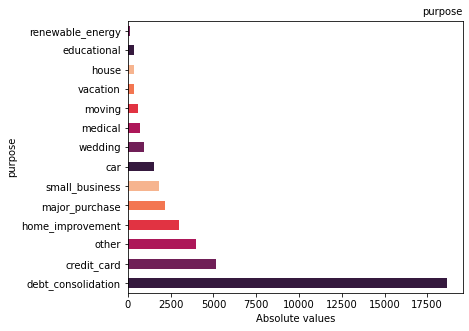

In [211]:
barh("purpose")

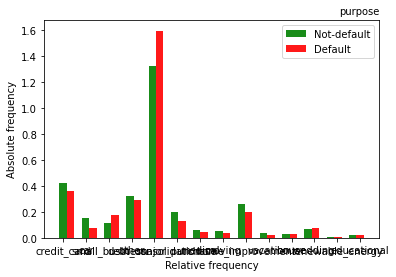

In [212]:
target("purpose")

#### DTI

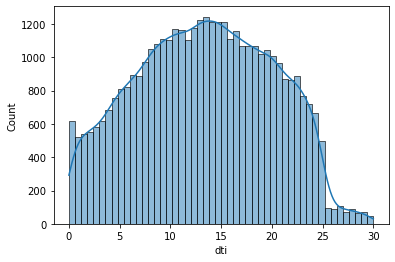

In [213]:
sns.histplot(df.dti,  kde=True)
plt.show()

In [214]:
stats("dti")

Variable: dti
Type of variable: float64
Total observations: 39717
Missing values False
Unique values: 2868
Min: 0
25%: 8
Median: 13
75%: 18
Max: 29
Mean: 13.315129541506161
Std dev: 6.6785935948023605
Variance: 44.60361240453511
Skewness: -0.0280422718226278
Kurtosis: -0.8520592885628617

Percentiles 1%, 5%, 95%, 99%


0.01     0.35
0.05     2.13
0.95    23.84
0.99    26.68
Name: dti, dtype: float64

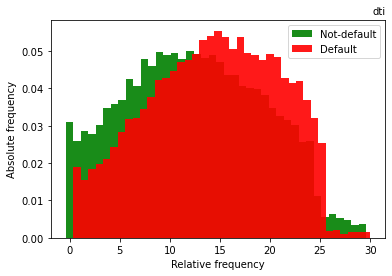

In [215]:
target("dti")

home_ownership,MORTGAGE,OTHER,OWN,RENT
purpose,,,,
car,8907.94,17.14,1687.10,6667.96
credit_card,32705.56,119.05,4350.64,37767.74
debt_consolidation,112387.27,561.69,19274.29,137755.94
educational,1120.17,29.74,173.48,2318.62
home_improvement,26375.55,48.72,3752.99,2933.27
house,1540.20,8.45,369.27,2145.85
major_purchase,10103.57,53.65,2597.11,10899.47
medical,3793.03,44.60,773.28,3825.82
moving,1249.25,14.67,238.53,5342.59


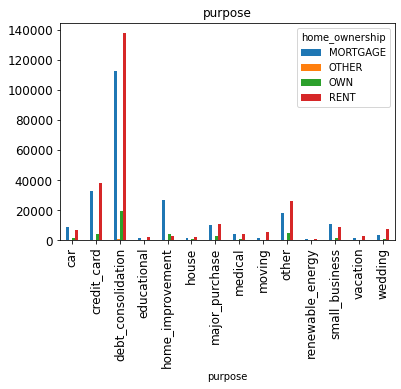

In [216]:
pivot_sum("home_ownership", "purpose", "dti")

#### REVOL_UTIL

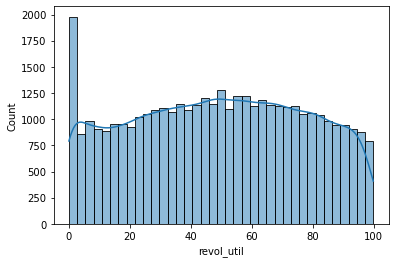

In [217]:
sns.histplot(df.revol_util,  kde=True)
plt.show()

In [218]:
stats("revol_util")

Variable: revol_util
Type of variable: float64
Total observations: 39717
Missing values False
Unique values: 1090
Min: 0
25%: 25
Median: 49
75%: 72
Max: 99
Mean: 48.83215241888711
Std dev: 28.31479348822216
Variance: 801.727530280668
Skewness: -0.03359844967314288
Kurtosis: -1.103039001574802

Percentiles 1%, 5%, 95%, 99%


0.01     0.000
0.05     2.700
0.95    93.500
0.99    98.484
Name: revol_util, dtype: float64

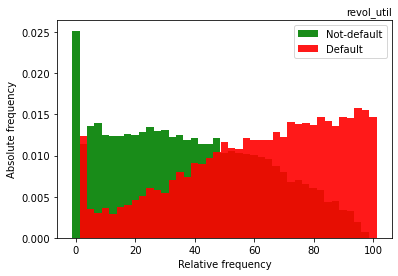

In [219]:
target("revol_util")

#### TOTAL_REC_LATE_FEE

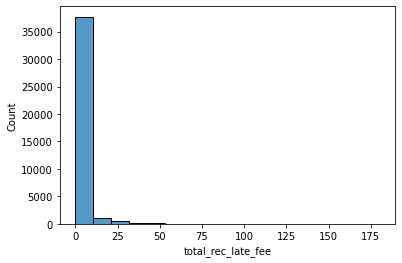

In [220]:
sns.histplot(df.total_rec_late_fee)
plt.show()

In [221]:
stats("total_rec_late_fee")

Variable: total_rec_late_fee
Type of variable: float64
Total observations: 39717
Missing values False
Unique values: 1356
Min: 0
25%: 0
Median: 0
75%: 0
Max: 180
Mean: 1.3630152124181854
Std dev: 7.289979301874133
Variance: 53.143798221753265
Skewness: 8.429217636377285
Kurtosis: 100.83869684992614

Percentiles 1%, 5%, 95%, 99%


0.01     0.000000
0.05     0.000000
0.95    14.924199
0.99    33.723600
Name: total_rec_late_fee, dtype: float64

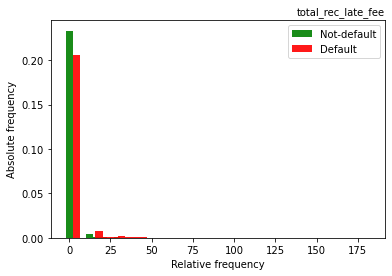

In [222]:
target("total_rec_late_fee")

#### GRADE_ENCODED

In [223]:
df['grade_encoded'].value_counts()

0    21722
1    17995
Name: grade_encoded, dtype: int64

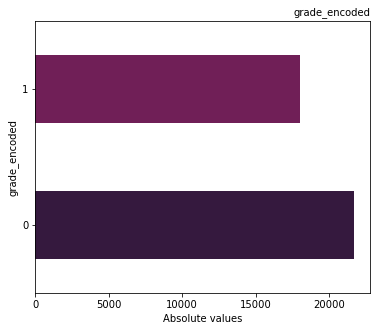

In [224]:
barh("grade_encoded")

## CORRELATIONS

### Heatmap → Pearson method

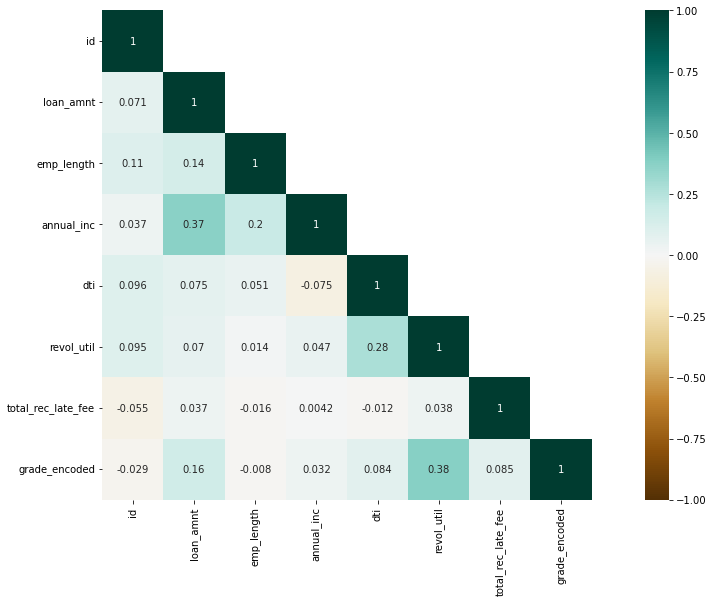

In [225]:
mask = np.triu(df.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

In [226]:
pip install pingouin

In [227]:
import pingouin as pg

In [228]:
grade_c = pg.pairwise_corr(df, columns=['grade_encoded'], method='pearson').loc[:,['X','Y','r']]
grade_c.sort_values(by=['r'], ascending=False)

,X,Y,r
5,grade_encoded,revol_util,0.380166
1,grade_encoded,loan_amnt,0.156463
6,grade_encoded,total_rec_late_fee,0.085364
4,grade_encoded,dti,0.083827
3,grade_encoded,annual_inc,0.031938
2,grade_encoded,emp_length,-0.008016
0,grade_encoded,id,-0.029178


### Heatmap → Spearman method

In [229]:
df_spear = df.copy()
df_spear.drop(["grade_encoded"], axis=1, inplace=True)

spearman_rank = pg.pairwise_corr(df_spear, method='spearman').loc[:,['X','Y','r']]
pos = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[:5,:]
neg = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[-5:,:]
con = pd.concat([pos,neg], axis=0)
display(con.reset_index(drop=True))

,X,Y,r
0,loan_amnt,annual_inc,0.380238
1,dti,revol_util,0.272194
2,emp_length,annual_inc,0.205644
3,loan_amnt,emp_length,0.136177
4,id,emp_length,0.121053
5,loan_amnt,total_rec_late_fee,-0.022116
6,emp_length,total_rec_late_fee,-0.023933
7,annual_inc,total_rec_late_fee,-0.037084
8,id,total_rec_late_fee,-0.052460
9,annual_inc,dti,-0.067407


<AxesSubplot:>

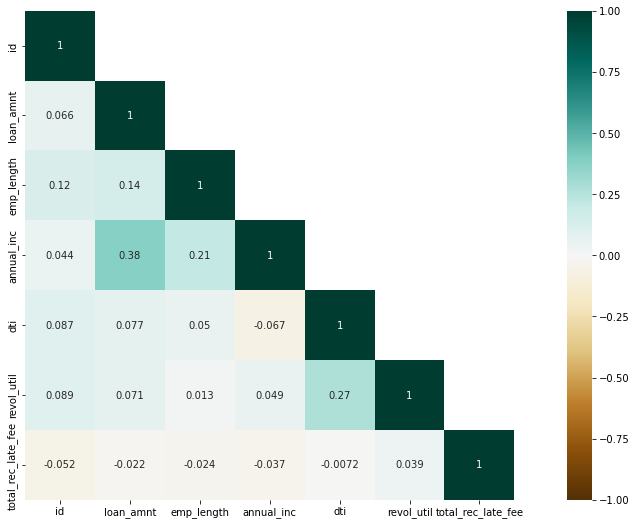

In [230]:
mask = np.triu(df_spear.corr(method='spearman'), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(df_spear.corr(method='spearman'), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   term                39717 non-null  object 
 1   id                  39717 non-null  int64  
 2   loan_amnt           38487 non-null  float64
 3   home_ownership      39717 non-null  object 
 4   emp_length          39717 non-null  float64
 5   annual_inc          37874 non-null  float64
 6   loan_status         39717 non-null  object 
 7   purpose             39717 non-null  object 
 8   dti                 39717 non-null  float64
 9   revol_util          39717 non-null  float64
 10  total_rec_late_fee  39717 non-null  float64
 11  grade               39717 non-null  object 
 12  grade_encoded       39717 non-null  int32  
dtypes: float64(6), int32(1), int64(1), object(5)
memory usage: 3.8+ MB


## ENCODING & TRANSFORMATIONS¶

In [232]:
for category in ['term', 'home_ownership', 'purpose', "loan_status"]:
  onehots = pd.get_dummies(df[category], prefix=category)
  df = df.join(onehots)
df.iloc[0:5,:] # 5 first rows (instances), from the 19th column to the last one

,term,id,loan_amnt,home_ownership,emp_length,annual_inc,loan_status,purpose,dti,revol_util,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,loan_status_Charged Off,loan_status_Current,loan_status_Fully Paid
0,36 months,1077501,5000.0,RENT,10.0,24000.0,Fully Paid,credit_card,27.65,83.7,...,0,0,0,0,0,0,0,0,0,1
1,60 months,1077430,2500.0,RENT,1.0,30000.0,Charged Off,car,1.00,9.4,...,0,0,0,0,0,0,0,1,0,0
2,36 months,1077175,2400.0,RENT,10.0,12252.0,Fully Paid,small_business,8.72,98.5,...,0,0,0,0,1,0,0,0,0,1
3,36 months,1076863,10000.0,RENT,10.0,49200.0,Fully Paid,other,20.00,21.0,...,0,0,1,0,0,0,0,0,0,1
4,60 months,1075358,3000.0,RENT,1.0,80000.0,Current,other,17.94,53.9,...,0,0,1,0,0,0,0,0,1,0


In [233]:
df.grade_encoded

0        0
1        0
2        0
3        0
4        1
        ..
39712    0
39713    1
39714    0
39715    0
39716    0
Name: grade_encoded, Length: 39717, dtype: int32

In [234]:
df.columns

Index(['term', 'id', 'loan_amnt', 'home_ownership', 'emp_length', 'annual_inc',
       'loan_status', 'purpose', 'dti', 'revol_util', 'total_rec_late_fee',
       'grade', 'grade_encoded', 'term_ 36 months', 'term_ 60 months',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'loan_status_Charged Off',
       'loan_status_Current', 'loan_status_Fully Paid'],
      dtype='object')

In [235]:
df['home_ownership_code'] = label_encoder.fit_transform(df['home_ownership'])

In [236]:
df['term_code'] = label_encoder.fit_transform(df['term'])

In [237]:
df['loan_status_code'] = label_encoder.fit_transform(df['loan_status'])

In [238]:
df['purpose_code'] = label_encoder.fit_transform(df['purpose'])

## BIẾN ĐỘC LẬP

In [239]:
dropcolumns = ['term', 'id', 'loan_amnt', 'home_ownership', 'emp_length', 'annual_inc',
       'loan_status', 'purpose', 'dti', 'revol_util', 'total_rec_late_fee',
       'grade', 'grade_encoded', 'term_ 36 months', 'term_ 60 months',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'loan_status_Charged Off',
       'loan_status_Current', 'loan_status_Fully Paid']

df_features = df.drop(dropcolumns, axis=1)
df_features.head()

,home_ownership_code,term_code,loan_status_code,purpose_code
0,3,0,2,1
1,3,1,0,0
2,3,0,2,11
3,3,0,2,9
4,3,1,1,9


## BIẾN PHỤ THUỘC 

In [240]:
df_grade = pd.DataFrame(df[['grade_encoded']], columns=['grade_encoded'])

In [241]:
df_grade.head()

,grade_encoded
0,0
1,0
2,0
3,0
4,1


In [242]:
combined_df = df_features.join(df_grade)
combined_df

,home_ownership_code,term_code,loan_status_code,purpose_code,grade_encoded
0,3,0,2,1,0
1,3,1,0,0,0
2,3,0,2,11,0
3,3,0,2,9,0
4,3,1,1,9,1
...,...,...,...,...,...
39712,0,0,2,4,0
39713,3,0,2,1,1
39714,0,0,2,2,0
39715,0,0,2,9,0


In [243]:
df['grade_encoded'].value_counts()

0    21722
1    17995
Name: grade_encoded, dtype: int64

## IMBALANCED DATA (UNDERSAMLING)

In [244]:
count_a, count_b= df['grade_encoded'].value_counts()

In [245]:
count_a

21722

In [246]:
count_b

17995

In [247]:
#Chia lớp
df_A = df[df['grade'] == 'A']
df_B = df[df['grade'] == 'B']


In [248]:
df_A_after = df_A.sample(count_b)
df_A_after

,term,id,loan_amnt,home_ownership,emp_length,annual_inc,loan_status,purpose,dti,revol_util,...,purpose_small_business,purpose_vacation,purpose_wedding,loan_status_Charged Off,loan_status_Current,loan_status_Fully Paid,home_ownership_code,term_code,loan_status_code,purpose_code
8682,36 months,862270,15000.0,RENT,4.0,40000.0,Fully Paid,debt_consolidation,11.34,85.4,...,0,0,0,0,0,1,3,0,2,2
15779,36 months,742644,15000.0,MORTGAGE,10.0,60000.0,Charged Off,home_improvement,6.04,72.5,...,0,0,0,1,0,0,0,0,0,4
36342,36 months,414231,6000.0,RENT,1.0,68496.0,Fully Paid,other,3.63,6.1,...,0,0,0,0,0,1,3,0,2,9
9388,60 months,850312,19600.0,MORTGAGE,4.0,39996.0,Fully Paid,small_business,20.73,8.2,...,1,0,0,0,0,1,0,1,2,11
18486,36 months,685661,15000.0,MORTGAGE,3.0,55000.0,Fully Paid,debt_consolidation,19.72,62.7,...,0,0,0,0,0,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29968,36 months,515756,11500.0,MORTGAGE,2.0,56000.0,Fully Paid,debt_consolidation,20.44,14.2,...,0,0,0,0,0,1,0,0,2,2
33899,36 months,460501,5000.0,MORTGAGE,5.0,50000.0,Fully Paid,car,3.17,6.8,...,0,0,0,0,0,1,0,0,2,0
5254,36 months,988099,5000.0,MORTGAGE,3.0,60000.0,Fully Paid,debt_consolidation,9.18,29.2,...,0,0,0,0,0,1,0,0,2,2
24375,36 months,591991,7500.0,RENT,1.0,40000.0,Fully Paid,debt_consolidation,19.80,33.2,...,0,0,0,0,0,1,3,0,2,2


In [249]:
df_ab = pd.concat([df_A_after, df_B], axis=0)
df_ab

,term,id,loan_amnt,home_ownership,emp_length,annual_inc,loan_status,purpose,dti,revol_util,...,purpose_small_business,purpose_vacation,purpose_wedding,loan_status_Charged Off,loan_status_Current,loan_status_Fully Paid,home_ownership_code,term_code,loan_status_code,purpose_code
8682,36 months,862270,15000.0,RENT,4.0,40000.0,Fully Paid,debt_consolidation,11.34,85.4,...,0,0,0,0,0,1,3,0,2,2
15779,36 months,742644,15000.0,MORTGAGE,10.0,60000.0,Charged Off,home_improvement,6.04,72.5,...,0,0,0,1,0,0,0,0,0,4
36342,36 months,414231,6000.0,RENT,1.0,68496.0,Fully Paid,other,3.63,6.1,...,0,0,0,0,0,1,3,0,2,9
9388,60 months,850312,19600.0,MORTGAGE,4.0,39996.0,Fully Paid,small_business,20.73,8.2,...,1,0,0,0,0,1,0,1,2,11
18486,36 months,685661,15000.0,MORTGAGE,3.0,55000.0,Fully Paid,debt_consolidation,19.72,62.7,...,0,0,0,0,0,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39697,36 months,101579,10000.0,RENT,1.0,27376.0,Fully Paid,small_business,10.70,54.4,...,1,0,0,0,0,1,3,0,2,11
39702,36 months,96350,5000.0,OWN,1.0,30000.0,Fully Paid,credit_card,18.64,47.1,...,0,0,0,0,0,1,2,0,2,1
39703,36 months,94838,3000.0,MORTGAGE,2.0,NaN,Fully Paid,home_improvement,0.00,0.0,...,0,0,0,0,0,1,0,0,2,4
39709,36 months,92533,5000.0,OWN,1.0,80000.0,Fully Paid,credit_card,1.21,16.1,...,0,0,0,0,0,1,2,0,2,1


In [250]:
print(df_ab.columns)

Index(['term', 'id', 'loan_amnt', 'home_ownership', 'emp_length', 'annual_inc',
       'loan_status', 'purpose', 'dti', 'revol_util', 'total_rec_late_fee',
       'grade', 'grade_encoded', 'term_ 36 months', 'term_ 60 months',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'loan_status_Charged Off',
       'loan_status_Current', 'loan_status_Fully Paid', 'home_ownership_code',
       'term_code', 'loan_status_code', 'purpose_code'],
      dtype='object')


In [251]:
sutuongquan = df_ab.corr()['grade_encoded'].sort_values(ascending=False)
print(sutuongquan)

grade_encoded                 1.000000
revol_util                    0.379702
term_ 60 months               0.306720
term_code                     0.306720
loan_amnt                     0.156010
loan_status_Charged Off       0.155181
purpose_debt_consolidation    0.087756
dti                           0.086246
total_rec_late_fee            0.082946
loan_status_Current           0.074398
home_ownership_RENT           0.060893
home_ownership_code           0.057750
purpose_small_business        0.043799
annual_inc                    0.032618
purpose_wedding               0.001633
purpose_educational           0.000940
purpose_house                -0.000279
home_ownership_OTHER         -0.002766
purpose_code                 -0.004461
emp_length                   -0.006527
purpose_renewable_energy     -0.008392
purpose_medical              -0.012569
purpose_moving               -0.013039
purpose_other                -0.014639
home_ownership_OWN           -0.014682
purpose_vacation         

<AxesSubplot:>

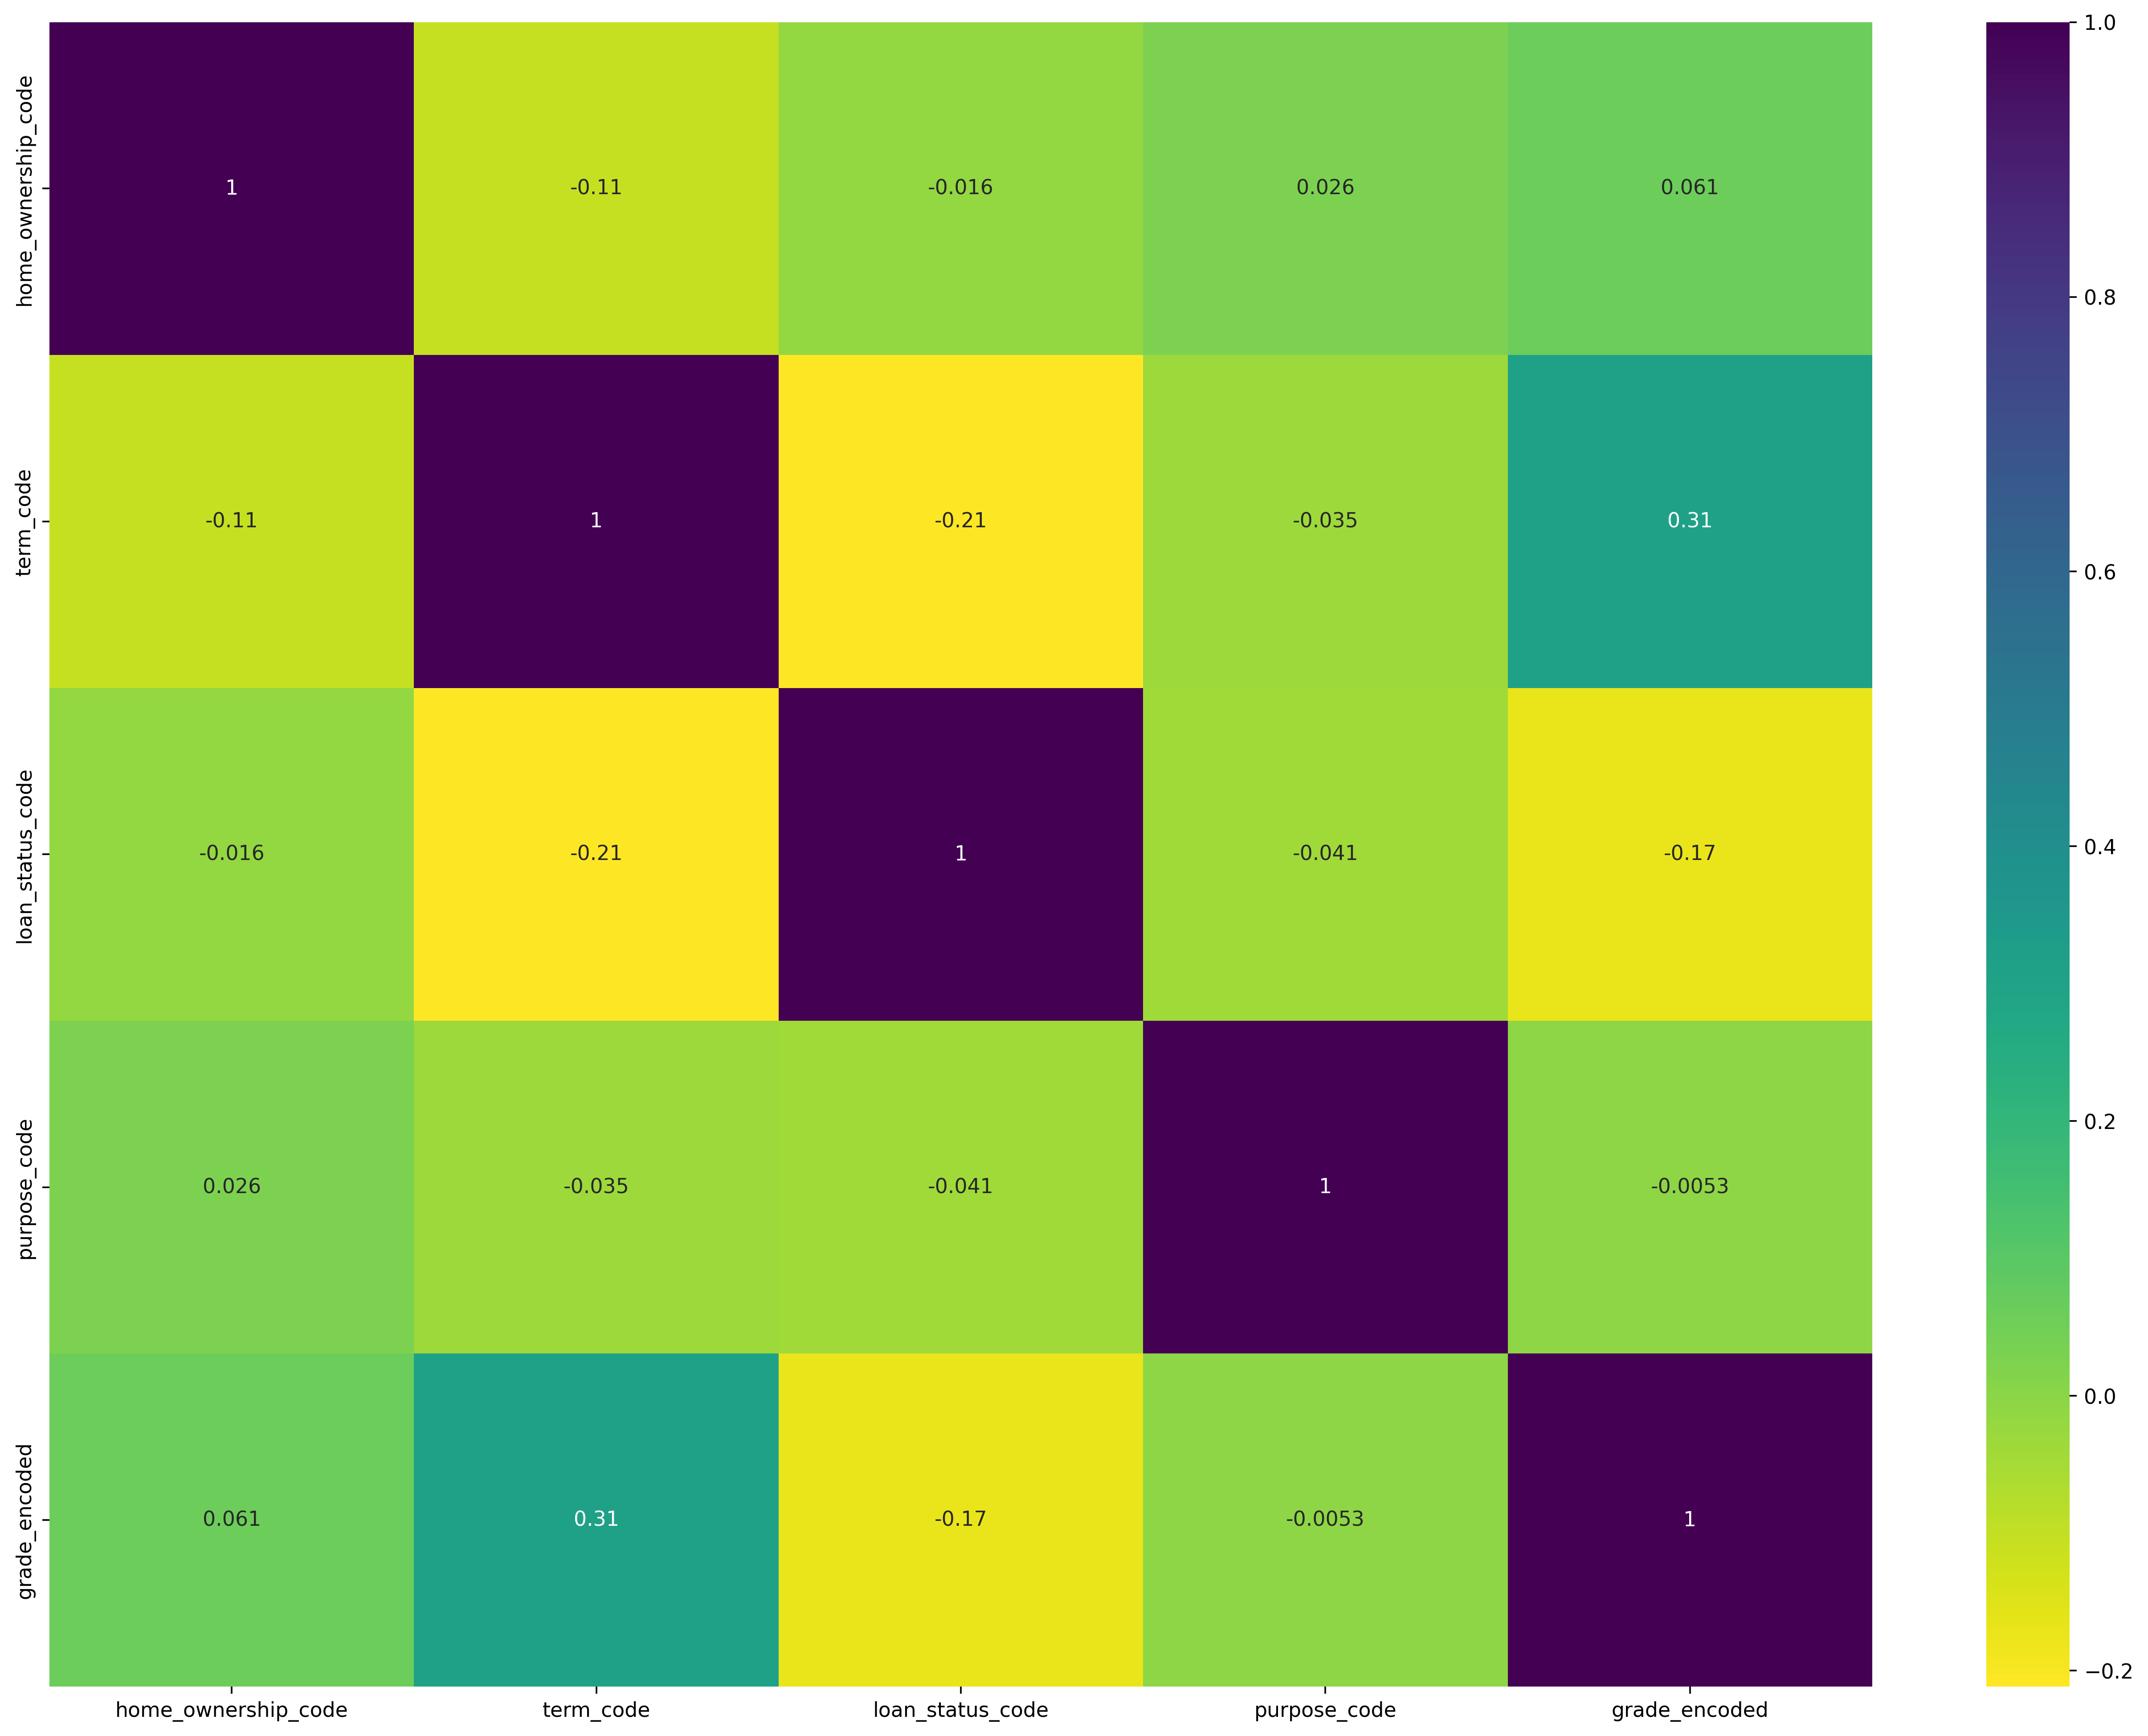

In [252]:
plt.figure(figsize=(20,15),dpi=330)
sns.heatmap(combined_df.corr(),annot=True, cmap='viridis_r')

In [253]:
df_ab.columns

Index(['term', 'id', 'loan_amnt', 'home_ownership', 'emp_length', 'annual_inc',
       'loan_status', 'purpose', 'dti', 'revol_util', 'total_rec_late_fee',
       'grade', 'grade_encoded', 'term_ 36 months', 'term_ 60 months',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'loan_status_Charged Off',
       'loan_status_Current', 'loan_status_Fully Paid', 'home_ownership_code',
       'term_code', 'loan_status_code', 'purpose_code'],
      dtype='object')

In [254]:
cut_ab = ['id', 'grade_encoded',
       'home_ownership_code', 'term_code', 'loan_status_code', 'purpose_code']

In [255]:
df_ft = df.drop(cut_ab, axis=1)
df_ft.head()

,term,loan_amnt,home_ownership,emp_length,annual_inc,loan_status,purpose,dti,revol_util,total_rec_late_fee,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,loan_status_Charged Off,loan_status_Current,loan_status_Fully Paid
0,36 months,5000.0,RENT,10.0,24000.0,Fully Paid,credit_card,27.65,83.7,0.00,...,0,0,0,0,0,0,0,0,0,1
1,60 months,2500.0,RENT,1.0,30000.0,Charged Off,car,1.00,9.4,0.00,...,0,0,0,0,0,0,0,1,0,0
2,36 months,2400.0,RENT,10.0,12252.0,Fully Paid,small_business,8.72,98.5,0.00,...,0,0,0,0,1,0,0,0,0,1
3,36 months,10000.0,RENT,10.0,49200.0,Fully Paid,other,20.00,21.0,16.97,...,0,0,1,0,0,0,0,0,0,1
4,60 months,3000.0,RENT,1.0,80000.0,Current,other,17.94,53.9,0.00,...,0,0,1,0,0,0,0,0,1,0


## Train Test Split

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
x_train, x_test, y_train, y_test = train_test_split(df_features,df_grade, test_size=0.3, random_state=101)

## CHỌN MÔ HÌNH

In [258]:
# Model Evaluation Classification test
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy: ", round(accuracy_score(y_test, y_pred),3))
    print("Precision:", round(precision_score(y_test, y_pred, average = 'micro'),3))
    print("Recall: ", round(recall_score(y_test, y_pred, average = 'micro'),3))
    print("F1-Score: ", round(f1_score(y_test, y_pred),3))  
    score = cross_validate(model, x, y, cv=5, scoring='roc_auc', return_train_score=True)
    

In [259]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tạo dữ liệu mẫu
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo các mô hình
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
ada_model = AdaBoostClassifier()

# Huấn luyện và đánh giá các mô hình
models = [dt_model, rf_model, lr_model, ada_model]
model_names = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'AdaBoost']
accuracies = []
precisions = []
recalls = []
f1_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Tạo DataFrame tổng hợp
summary_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})

# In bảng tổng hợp
print(summary_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0        Decision Tree      0.83   0.853211  0.837838  0.845455
1        Random Forest      0.87   0.912621  0.846847  0.878505
2  Logistic Regression      0.83   0.866667  0.819820  0.842593
3             AdaBoost      0.88   0.939394  0.837838  0.885714


In [260]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, cohen_kappa_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Tạo dữ liệu mẫu
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier()

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = rf_model.predict(X_test)

# Tính F1-Score
f1 = f1_score(y_test, y_pred)

# Tính trọng số Kappa
kappa_weight = cohen_kappa_score(y_test, y_pred, weights='linear')

# Tính F-Kappa score
f_kappa = (2 * f1 * kappa_weight) / (f1 + kappa_weight)

# Tạo DataFrame tổng hợp
summary_df = pd.DataFrame({
    'F1-Score': [f1],
    'Cohen_Kappa': [kappa_weight],
    'F-Kappa Score': [f_kappa]
})

# In bảng tổng hợp
print(summary_df)

   F1-Score  Cohen_Kappa  F-Kappa Score
0  0.883721     0.748895       0.810741


In [261]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Tạo dữ liệu mẫu
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo các mô hình
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
ada_model = AdaBoostClassifier()

# Huấn luyện và đánh giá các mô hình
models = [dt_model, rf_model, lr_model, ada_model]
model_names = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'AdaBoost']
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappa_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    kappa_scores.append(kappa)

# Tạo DataFrame tổng hợp
summary_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores,
    'Cohen Kappa': kappa_scores
})

# In bảng tổng hợp
print(summary_df)

                 Model  Accuracy  Precision    Recall  F1-Score  Cohen Kappa
0        Decision Tree     0.835   0.854545  0.846847  0.850679     0.666330
1        Random Forest     0.875   0.913462  0.855856  0.883721     0.748895
2  Logistic Regression     0.830   0.866667  0.819820  0.842593     0.658120
3             AdaBoost     0.880   0.939394  0.837838  0.885714     0.760264


## MACHINE LEARNING (DECISION TREES) DỰ ĐOÁN KHÁCH HÀNG CÓ VỠ NỢ HAY KHÔNG

In [114]:
df['home_ownership_code'] = label_encoder.fit_transform(df['home_ownership'])

In [115]:
df['term_code'] = label_encoder.fit_transform(df['term'])

In [116]:
df['loan_status_code'] = label_encoder.fit_transform(df['loan_status'])

In [117]:
df['purpose_code'] = label_encoder.fit_transform(df['purpose'])

In [118]:
df['purpose_code'].value_counts()

2     18641
1      5130
9      3993
4      2976
6      2187
11     1828
0      1549
13      947
7       693
8       583
12      381
5       381
3       325
10      103
Name: purpose_code, dtype: int64

In [119]:
df['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [120]:
df['home_ownership_code'].value_counts()

3    18900
0    17659
2     3060
1       98
Name: home_ownership_code, dtype: int64

In [121]:
df['home_ownership'].value_counts()

RENT        18900
MORTGAGE    17659
OWN          3060
OTHER          98
Name: home_ownership, dtype: int64

In [122]:
df['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [123]:
df['term_code'].value_counts()

0    29096
1    10621
Name: term_code, dtype: int64

In [124]:
df['loan_status_code'].value_counts()

2    32950
0     5627
1     1140
Name: loan_status_code, dtype: int64

In [125]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [126]:
df['grade'].value_counts()

A    21722
B    17995
Name: grade, dtype: int64

In [127]:
df['grade_encoded'].value_counts()

0    21722
1    17995
Name: grade_encoded, dtype: int64

In [128]:
df_biendoclap = pd.DataFrame(df[['home_ownership_code','term_code','loan_status_code', 'purpose_code']])
df_biendoclap.head()

,home_ownership_code,term_code,loan_status_code,purpose_code
0,3,0,2,1
1,3,1,0,0
2,3,0,2,11
3,3,0,2,9
4,3,1,1,9


In [129]:
# Decision Tree algorithm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier() 

In [130]:
model.fit(df_biendoclap, df_grade)

DecisionTreeClassifier()

### Khách hàng có nhà thuê (RENT), TERM 60 tháng, CHARGED OFF thì có vỡ nợ hay không 

#### (1: vỡ nợ, 0: không)

In [131]:
model.predict([[3,0,2,1]])

array([0])

In [132]:
model.predict([[3,1,2,11]])

array([1])

### Khách hàng có nhà thuê (RENT), TERM 60 tháng, FULLY PAID thì có vỡ nợ hay không

In [133]:
model.predict([[3,1,2,5]])

array([1])

### Khách hàng có nhà (OWN), TERM 36 tháng, FULLY PAID thì có vỡ nợ hay không

In [134]:
model.predict([[2,0,2,13]])

array([0])

# MACHINE LEARNING (RANDOM FOREST)
### Predict khách hàng có vỡ nợ hay không dựa vào loại nhà, thời hạn và trạng thái khoản vay
### 1: vỡ nợ                       ### 0: không vỡ nợ

### 3: Rent          ### 0: Mortgage           ### 2: own      ### 1: orther
### 0: 36 tháng    ###1: 60 tháng            
### 0: Charged off                           ###2: Fully paid                                                ###   1: Current


In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [137]:
rf_classifier.fit(df_biendoclap, df_grade)

RandomForestClassifier()

In [138]:
rf_classifier.predict([[3,1,0,1]])

array([1])

In [139]:
rf_classifier.predict([[3,0,2,15]])

array([0])

In [140]:
rf_classifier.predict([[2,1,0,0]])

array([1])

In [141]:
rf_classifier.predict([[2,1,1,10]])

array([1])

In [142]:
rf_classifier.predict([[2,1,2,1]])

array([1])

In [143]:
from sklearn.svm import SVC

In [144]:
svc = SVC()

In [145]:
type(y_train)

numpy.ndarray

In [146]:
x_train.shape

(27801, 4)

In [147]:
y_train

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [148]:
y_test

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1])